In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def Smax(mA, mB):
    Smax = np.zeros([mA.size])
    for i in range(mA.size):
        Smax[i] = max(mA[i], mB[i])
    return Smax

In [3]:
def Tmin(mA, mB):
    Tmin = np.zeros([mA.size])
    for i in range(mA.size):
        Tmin[i] = min(mA[i], mB[i])
    return Tmin

In [4]:
def vec_medio(inicio, fin, dominio):    
    #armar vector que abarque todo el dominio y sea triangular desde inicio hasta fin
    medio = np.zeros(len(dominio))
    for i in range(len(dominio)):
        if dominio[i] <= inicio:
            medio[i] = 0
        elif dominio[i] >= fin:
            medio[i] = 0
        elif dominio[i] < (inicio + fin)/2:
            medio[i] = 2*(dominio[i] - inicio)/(fin - inicio)
        else:
            medio[i] = 2*(fin - dominio[i])/(fin - inicio)
    return medio

In [5]:
def vec_extremo(inicio, fin, dominio,lado):    
    #armar vector que sea 1 en uno de los extremos y 0 en el otro, yendo la diagonal desde inicio hasta fin(valor 1 a 0)
    if lado=='izq':
        extremo = np.zeros(len(dominio))
        for i in range(len(dominio)):
            if dominio[i] <= inicio:
                extremo[i] = 1
            elif dominio[i] >= fin:
                extremo[i] = 0
            else:
                extremo[i] = 1 - (dominio[i] - inicio)/(fin - inicio)
        return extremo
    elif lado=='der':
        extremo = np.zeros(len(dominio))
        for i in range(len(dominio)):
            if dominio[i] <= inicio:
                extremo[i] = 0
            elif dominio[i] >= fin:
                extremo[i] = 1
            else:
                extremo[i] = (dominio[i] - inicio)/(fin - inicio)
        return extremo

In [6]:
def cut(value, mf):
    value = float(value)
    aux = np.zeros(mf.size)
    if (type(value) is int) or (type(value) is float):
        for i in range(mf.size):
            aux[i] = min(value, mf[i])
        return aux
    else:
        return -1

In [7]:
def union(data):
    aux = np.zeros(data[0].size)
    for j in range(len(data)):
        for i in range(aux.size):
            aux[i] = max(aux[i], data[j][i])
    return aux

In [8]:
def defuzz(y, mf, option):
    if option == 'centroid':
        num = 0
        den = 0
        for i in range(y.size):
            num = num + y[i]*mf[i]
            den = den + mf[i]
        y0 = num/den
        return y0
    
    elif option == 'bisector':
        area = 0
        aux = 0
        for i in range(y.size - 1):
            area = area + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
        for i in range(y.size):
            aux = aux + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
            if (aux >= area/2):
                return y[i]
        
    elif option == 'MOM':
        mf_max = max(mf)
        acum = 0
        n = 0
        for i in range(y.size):
            if (mf[i] == mf_max):
                acum = acum + y[i]
                n = n + 1
        return acum/n

    elif option == 'SOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[i] == mf_max):
                return y[i]
        
    elif option == 'LOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[y.size - i -1] == mf_max):
                return y[y.size - i -1]
            
    else:
        return -1
    

In [9]:
# Variables de entrada
posicion_angular = 0.5
velocidad_angular = -0.2

# Conjuntos difusos
# Define tus conjuntos difusos aquí
dominio_pos = np.linspace(-180, 180, 3600)
dominio_vel = np.linspace(-20,20,400)
dominio_fuerza = np.linspace(-20,20,400)

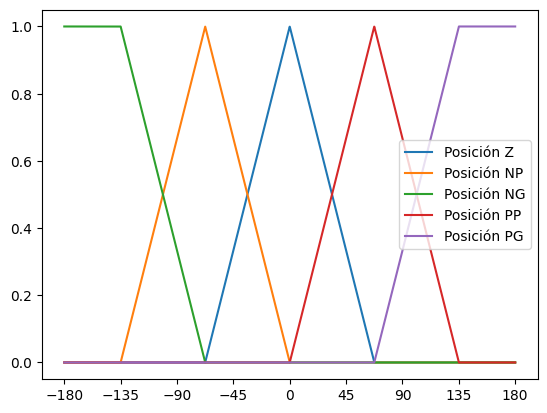

In [18]:
pos_z = vec_medio(-67.5, 67.5, dominio_pos)
pos_np = vec_medio(-135, 0, dominio_pos)
pos_ng = vec_extremo(-135, -67.5, dominio_pos,'izq')
pos_pp = vec_medio(0, 135, dominio_pos)
pos_pg = vec_extremo(67.5, 135, dominio_pos,'der')
#plot de todos los conjuntos difusos con distintos colores
plt.plot(dominio_pos,pos_z, label='Posición Z')
plt.plot(dominio_pos,pos_np, label='Posición NP')
plt.plot(dominio_pos,pos_ng, label='Posición NG')
plt.plot(dominio_pos,pos_pp, label='Posición PP')
plt.plot(dominio_pos,pos_pg, label='Posición PG')
plt.legend(loc='best')
plt.xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])

plt.show()

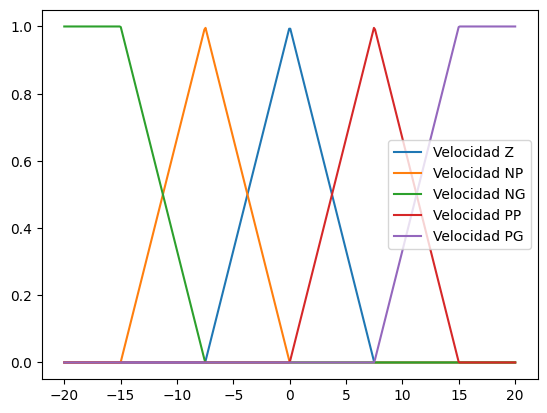

In [11]:
vel_z = vec_medio(-7.5, 7.5, dominio_vel)
vel_np = vec_medio(-15, 0, dominio_vel)
vel_ng = vec_extremo(-15, -7.5, dominio_vel,'izq')
vel_pp = vec_medio(0, 15, dominio_vel)
vel_pg = vec_extremo(7.5, 15, dominio_vel,'der')
#plot de todos los conjuntos difusos con distintos colores
plt.plot(dominio_vel,vel_z, label='Velocidad Z')
plt.plot(dominio_vel,vel_np, label='Velocidad NP')
plt.plot(dominio_vel,vel_ng, label='Velocidad NG')
plt.plot(dominio_vel,vel_pp, label='Velocidad PP')
plt.plot(dominio_vel,vel_pg, label='Velocidad PG')
plt.legend(loc='best')
plt.show()

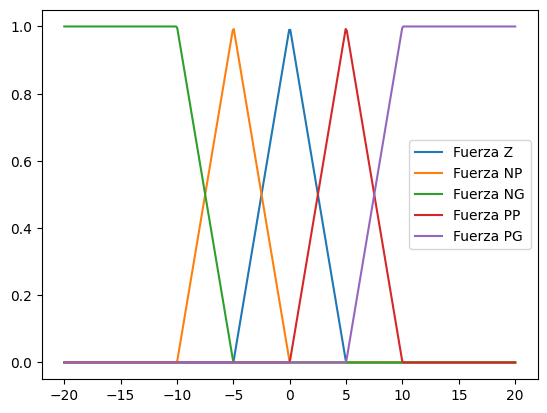

In [12]:
fuerza_z = vec_medio(-5, 5, dominio_fuerza)
fuerza_np = vec_medio(-10, 0, dominio_fuerza)
fuerza_ng = vec_extremo(-10, -5, dominio_fuerza,'izq')
fuerza_pp = vec_medio(0, 10, dominio_fuerza)
fuerza_pg = vec_extremo(5, 10, dominio_fuerza,'der')
#plot de todos los conjuntos difusos con distintos colores
plt.plot(dominio_fuerza,fuerza_z, label='Fuerza Z')
plt.plot(dominio_fuerza,fuerza_np, label='Fuerza NP')
plt.plot(dominio_fuerza,fuerza_ng, label='Fuerza NG')
plt.plot(dominio_fuerza,fuerza_pp, label='Fuerza PP')
plt.plot(dominio_fuerza,fuerza_pg, label='Fuerza PG')
plt.legend(loc='best')
plt.show()

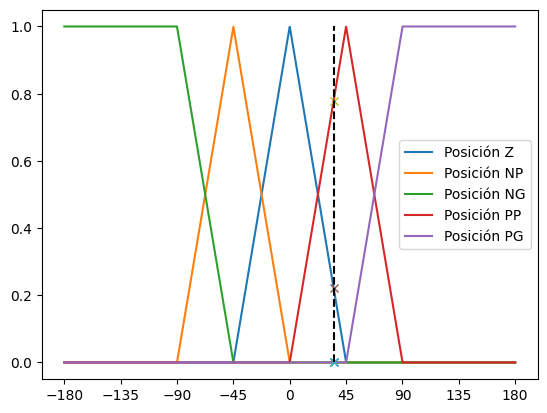

Pertenencia a Posición Z: 0.2222222222222222
Pertenencia a Posición NP: 0.0
Pertenencia a Posición NG: 0.0
Pertenencia a Posición PP: 0.7777777777777778
Pertenencia a Posición PG: 0.0


In [13]:
pos = 35
vel = 0.5
#fuzzificar: encontrar la pertencnec ade pos a cada conjunto difuso de entrada
pert_pos_z = np.interp(pos, dominio_pos, pos_z)
pert_pos_np = np.interp(pos, dominio_pos, pos_np)
pert_pos_ng = np.interp(pos, dominio_pos, pos_ng)
pert_pos_pp = np.interp(pos, dominio_pos, pos_pp)
pert_pos_pg = np.interp(pos, dominio_pos, pos_pg)

pert_vel_z = np.interp(vel, dominio_vel, vel_z)
pert_vel_np = np.interp(vel, dominio_vel, vel_np)
pert_vel_ng = np.interp(vel, dominio_vel, vel_ng)
pert_vel_pp = np.interp(vel, dominio_vel, vel_pp)
pert_vel_pg = np.interp(vel, dominio_vel, vel_pg)

#grafiicar pertenencias
plt.plot(dominio_pos,pos_z, label='Posición Z')
plt.plot(dominio_pos,pos_np, label='Posición NP')
plt.plot(dominio_pos,pos_ng, label='Posición NG')
plt.plot(dominio_pos,pos_pp, label='Posición PP')
plt.plot(dominio_pos,pos_pg, label='Posición PG')
plt.plot(pos,pert_pos_z,'x')
plt.plot(pos,pert_pos_np,'x')
plt.plot(pos,pert_pos_ng,'x')
plt.plot(pos,pert_pos_pp,'x')
plt.plot(pos,pert_pos_pg,'x')
plt.plot([pos,pos],[0,1],'k--')
plt.legend(loc='best')
plt.xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
plt.show()

print('Pertenencia a Posición Z:', pert_pos_z)
print('Pertenencia a Posición NP:', pert_pos_np)
print('Pertenencia a Posición NG:', pert_pos_ng)
print('Pertenencia a Posición PP:', pert_pos_pp)
print('Pertenencia a Posición PG:', pert_pos_pg)



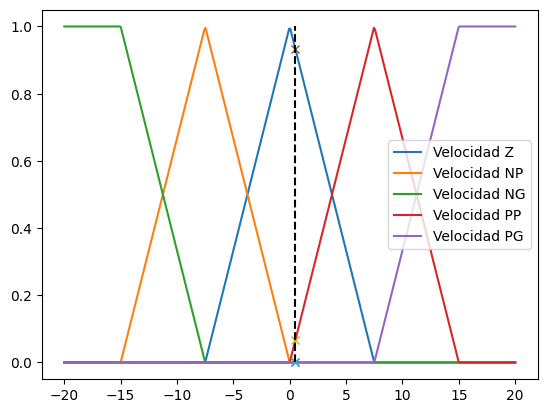

Pertenencia a Velocidad Z: 0.9333333333333333
Pertenencia a Velocidad NP: 0.0
Pertenencia a Velocidad NG: 0.0
Pertenencia a Velocidad PP: 0.06666666666666667
Pertenencia a Velocidad PG: 0.0


In [14]:
#graficar pertenencias a la velocidad
plt.plot(dominio_vel,vel_z, label='Velocidad Z')
plt.plot(dominio_vel,vel_np, label='Velocidad NP')
plt.plot(dominio_vel,vel_ng, label='Velocidad NG')
plt.plot(dominio_vel,vel_pp, label='Velocidad PP')
plt.plot(dominio_vel,vel_pg, label='Velocidad PG')
plt.plot(vel,pert_vel_z,'x')
plt.plot(vel,pert_vel_np,'x')
plt.plot(vel,pert_vel_ng,'x')
plt.plot(vel,pert_vel_pp,'x')
plt.plot(vel,pert_vel_pg,'x')
plt.plot([vel,vel],[0,1],'k--')
plt.legend(loc='best')
plt.show()

print('Pertenencia a Velocidad Z:', pert_vel_z)
print('Pertenencia a Velocidad NP:', pert_vel_np)
print('Pertenencia a Velocidad NG:', pert_vel_ng)
print('Pertenencia a Velocidad PP:', pert_vel_pp)
print('Pertenencia a Velocidad PG:', pert_vel_pg)


In [15]:
#notocar
# reglas = np.zeros((5,5))
# #z
# reglas[0,0] = min(pert_pos_z, pert_vel_z) #fuerza cero
# reglas[0,1] = min(pert_pos_z, pert_vel_np) #fuerza poco negativa
# reglas[0,2] = min(pert_pos_z, pert_vel_ng) #fuerza muy negativa
# reglas[0,3] = min(pert_pos_z, pert_vel_pp) #fuerza poco positiva
# reglas[0,4] = min(pert_pos_z, pert_vel_pg) #fuerza muy positiva

# #poconegativa
# reglas[1,0] = min(pert_pos_np, pert_vel_z) #fuerza poco positiva
# reglas[1,1] = min(pert_pos_np, pert_vel_np) #fuerza poco positiva
# reglas[1,2] = min(pert_pos_np, pert_vel_ng) #fuerza muy positiva
# reglas[1,3] = min(pert_pos_np, pert_vel_pp) #fuerza poco negativa
# reglas[1,4] = min(pert_pos_np, pert_vel_pg) #fuerza muy negativa

# #muynegativa
# reglas[2,0] = min(pert_pos_ng, pert_vel_z) #fuerza muy negativa
# reglas[2,1] = min(pert_pos_ng, pert_vel_np) #fuerza muy positiva
# reglas[2,2] = min(pert_pos_ng, pert_vel_ng) #fuerza muy positiva
# reglas[2,3] = min(pert_pos_ng, pert_vel_pp) #fuerza muy negativa
# reglas[2,4] = min(pert_pos_ng, pert_vel_pg) #fuerza muy negativa

# #pocopositiva
# reglas[3,0] = min(pert_pos_pp, pert_vel_z) #fuerza poco negativa
# reglas[3,1] = min(pert_pos_pp, pert_vel_np) #fuerza poco negativa
# reglas[3,2] = min(pert_pos_pp, pert_vel_ng) #fuerza muy negativa
# reglas[3,3] = min(pert_pos_pp, pert_vel_pp) #fuerza poco positiva
# reglas[3,4] = min(pert_pos_pp, pert_vel_pg) #fuerza muy positiva
# #muy positiva
# reglas[4,0] = min(pert_pos_pg, pert_vel_z) #fuerza muy positiva
# reglas[4,1] = min(pert_pos_pg, pert_vel_np) #fuerza muy negativa
# reglas[4,2] = min(pert_pos_pg, pert_vel_ng) #fuerza muy negativa
# reglas[4,3] = min(pert_pos_pg, pert_vel_pp) #fuerza muy positiva
# reglas[4,4] = min(pert_pos_pg, pert_vel_pg) #fuerza muy positiva

In [16]:
#Reglas de inferencia
# Define tus reglas de inferencia aquí
FZ=[min(pert_pos_z, pert_vel_z)]
FPP=[min(pert_pos_z, pert_vel_pp),min(pert_pos_np, pert_vel_z),min(pert_pos_np, pert_vel_np),min(pert_pos_pp, pert_vel_pp)]
FPG=[min(pert_pos_z, pert_vel_pg),min(pert_pos_np, pert_vel_ng),min(pert_pos_ng, pert_vel_np),min(pert_pos_ng, pert_vel_ng),min(pert_pos_pp, pert_vel_pg),min(pert_pos_pg, pert_vel_z),min(pert_pos_pg, pert_vel_pp),min(pert_pos_pg, pert_vel_pg)]
FNP=[min(pert_pos_z, pert_vel_np),min(pert_pos_np, pert_vel_pp),min(pert_pos_pp, pert_vel_z),min(pert_pos_pp, pert_vel_np)]
FNG=[min(pert_pos_z, pert_vel_ng),min(pert_pos_np, pert_vel_pg),min(pert_pos_ng, pert_vel_z),min(pert_pos_ng, pert_vel_pp),min(pert_pos_ng, pert_vel_pg),min(pert_pos_pp, pert_vel_ng),min(pert_pos_pg, pert_vel_np),min(pert_pos_pg, pert_vel_ng)]



print("Fuerza zero",FZ)
print("Fuerza poco positiva",FPP)
print("Fuerza muy positiva",FPG)
print("Fuerza poco negativa",FNP)
print("Fuerza muy negativa",FNG)


Fuerza zero [0.2222222222222222]
Fuerza poco positiva [0.06666666666666667, 0.0, 0.0, 0.06666666666666667]
Fuerza muy positiva [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Fuerza poco negativa [0.0, 0.0, 0.7777777777777778, 0.0]
Fuerza muy negativa [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


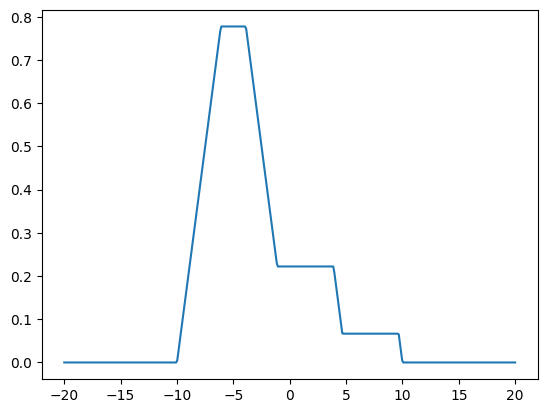

-5.0125313283208035

In [17]:
fuerza_z_c = cut(FZ[0],fuerza_z)
fuerza_pp_c = cut(max(FPP),fuerza_pp)
fuerza_pg_c = cut(max(FPG),fuerza_pg)
fuerza_np_c = cut(max(FNP),fuerza_np)
fuerza_ng_c = cut(max(FNG),fuerza_ng)
fuerza=union([fuerza_z_c,fuerza_pp_c,fuerza_pg_c,fuerza_np_c,fuerza_ng_c])
plt.plot(dominio_fuerza,fuerza, label='Fuerza')
plt.show()
algo=defuzz(dominio_fuerza,fuerza,'MOM')
algo